#### Проверка гипотез о распределении случайной величины

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
x = np.array(pd.read_csv("sample.csv")["0"])
x.sort()
x

array([17667.80929213, 17954.75153154, 19083.26198521, 19703.08243554,
       19753.87079109, 19818.25412157, 20040.20395158, 20156.72887831,
       20265.02386789, 20434.94385729, 20701.25249257, 21041.34565428,
       21045.16577173, 21069.70150104, 21101.5680916 , 21205.26010819,
       21421.0961794 , 21483.5062025 , 21575.92398766, 21706.02355443,
       21872.6311641 , 21874.31618785, 21930.14886028, 21945.33439894,
       21988.55152376, 22032.10463236, 22080.19159045, 22151.19965854,
       22243.31304728, 22424.05450774, 22425.23572239, 22468.20516204,
       22480.86583852, 22593.765623  , 22773.64856913, 22780.21275532,
       22915.6986266 , 23026.45092479, 23178.94407928, 23258.28877856,
       23318.86026608, 23361.57232668, 23372.57621755, 23469.78306268,
       23539.20205489, 23648.63931565, 23681.99621419, 23736.32893338,
       23737.20204592, 23751.22794803, 23769.25436206, 23823.12766599,
       23863.03192283, 23899.15270568, 23912.48158568, 23984.61549613,
      

Далее определим основные числовые характеристики:

In [3]:
np.mean(x) # математическое ожидание

30065.77823950663

In [4]:
pd.Series(x).mode() # мода

0      17667.809292
1      17954.751532
2      19083.261985
3      19703.082436
4      19753.870791
           ...     
995    41579.361937
996    41651.463898
997    41679.702293
998    42232.433755
999    43355.392556
Length: 1000, dtype: float64

In [5]:
np.median(x) # медиана

30080.976812735396

In [6]:
np.var(x) # дисперсия

15191020.447637465

In [7]:
np.std(x) # стандартное отклонение

3897.5659645011096

Три вероятностных распределения для проверки гипотезы о распределении: 
    1) нормальное;
    2) логистическое;
    3) Лапласа.

C:\Users\Den\AppData\Local\Temp/ipykernel_17636/1501650166.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend((l1,l2, l3), labels=["Нормальное распределение", "Логистическое распределение", "Распределение Лапласа"], loc='upper right');


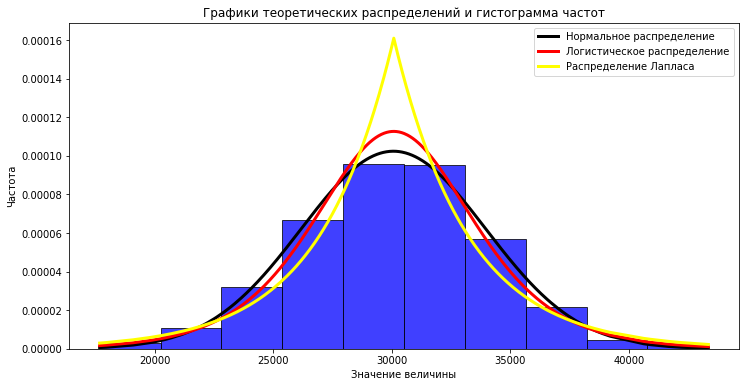

In [39]:
mean=np.mean(x)
var=np.var(x)
std=np.sqrt(var)

# x = np.array(pd.Series(x).sort_values())
y_pdf = stats.norm.pdf(x, mean, std)
y_gamma_pdf = stats.logistic.pdf(x, *stats.logistic.fit(x))
y_laplace_pdf = stats.laplace.pdf(x, *stats.laplace.fit(x))

plt.figure(figsize=(12, 6))
l1 = plt.plot(x, y_pdf, color="black", linewidth=3)
l2 = plt.plot(x, y_gamma_pdf, color="red", linewidth=3)
l3 = plt.plot(x, y_laplace_pdf, color="yellow", linewidth=3)
plt.hist(x,10,density=True, facecolor='blue', edgecolor='black', alpha=0.75)

plt.xlabel('Значение величины')
plt.ylabel('Частота')
plt.title("Графики теоретических распределений и гистограмма частот")

plt.legend((l1,l2, l3), labels=["Нормальное распределение", "Логистическое распределение", "Распределение Лапласа"], loc='upper right');

#### Проверка гипотезы о нормальном распределении

In [9]:
def make_intervals(n):

    intervals = [[x[0], x[0] + (x.max() - x.min()) / n]]

    for i in range(2, n + 1):


        interval = [intervals[i - 2][1], intervals[i - 2][1] + ((x.max() - x.min()) / n)]

        intervals.append(interval)


    intervals = np.array(intervals)

    f_obs = []
    
    for i in range(len(intervals)):

        count = 0

        for elem in x:

            if elem >= intervals[i, 0] and elem <= intervals[i, 1]:
                
                count += 1

            elif elem > intervals[i, 1]:

                break

        f_obs.append(count)
        
    return f_obs

f_obs = np.array(make_intervals(10))
f_obs

array([  8,  28,  82, 171, 246, 245, 146,  56,  12,   6])

In [10]:
def make_intervals(n):

    intervals = [[x[0], x[0] + (x.max() - x.min()) / n]]

    for i in range(2, n + 1):


        interval = [intervals[i - 2][1], intervals[i - 2][1] + ((x.max() - x.min()) / n)]

        intervals.append(interval)


    intervals = np.array(intervals)

    f_obs = []
    
    for i in range(len(intervals)):

        count = 0

        for elem in x:

            if elem >= intervals[i, 0] and elem <= intervals[i, 1]:
                
                count += 1

            elif elem > intervals[i, 1]:

                break

        f_obs.append(count)
        
    return intervals

intervals = make_intervals(10)
intervals

array([[17667.80929213, 20236.56761849],
       [20236.56761849, 22805.32594485],
       [22805.32594485, 25374.08427121],
       [25374.08427121, 27942.84259757],
       [27942.84259757, 30511.60092393],
       [30511.60092393, 33080.35925029],
       [33080.35925029, 35649.11757665],
       [35649.11757665, 38217.87590301],
       [38217.87590301, 40786.63422937],
       [40786.63422937, 43355.39255573]])

In [13]:
f_obs

array([  8,  28,  82, 171, 246, 245, 146,  56,  12,   6])

In [14]:
z = (x - stats.norm.fit(x)[0]) / stats.norm.fit(x)[1]
z

array([-3.18095167e+00, -3.10733078e+00, -2.81778842e+00, -2.65876085e+00,
       -2.64573006e+00, -2.62921121e+00, -2.57226545e+00, -2.54236861e+00,
       -2.51458332e+00, -2.47098689e+00, -2.40265998e+00, -2.31540214e+00,
       -2.31442201e+00, -2.30812687e+00, -2.29995085e+00, -2.27334655e+00,
       -2.21796940e+00, -2.20195684e+00, -2.17824517e+00, -2.14486548e+00,
       -2.10211890e+00, -2.10168657e+00, -2.08736156e+00, -2.08346540e+00,
       -2.07237717e+00, -2.06120273e+00, -2.04886504e+00, -2.03064647e+00,
       -2.00701291e+00, -1.96064000e+00, -1.96033694e+00, -1.94931225e+00,
       -1.94606389e+00, -1.91709715e+00, -1.87094452e+00, -1.86926034e+00,
       -1.83449868e+00, -1.80608292e+00, -1.76695769e+00, -1.74660019e+00,
       -1.73105934e+00, -1.72010069e+00, -1.71727742e+00, -1.69233702e+00,
       -1.67452616e+00, -1.64644780e+00, -1.63788941e+00, -1.62394925e+00,
       -1.62372523e+00, -1.62012660e+00, -1.61550156e+00, -1.60167926e+00,
       -1.59144101e+00, -

In [15]:
from scipy import integrate

In [16]:
f = lambda e: np.exp(-e ** 2 / 2) / np.sqrt(2 * np.pi)

f_exp = np.array([integrate.quad(f, z[0], z[7])[0], integrate.quad(f, z[7], z[35])[0], integrate.quad(f, z[35], z[117])[0],\
    integrate.quad(f, z[117], z[288])[0], integrate.quad(f, z[288], z[534])[0], integrate.quad(f, z[534], z[779])[0],\
        integrate.quad(f, z[779], z[925])[0], integrate.quad(f, z[925], z[981])[0], integrate.quad(f, z[981], z[993])[0],\
            integrate.quad(f, z[993], z[999])[0]]) * 1000

f_exp

array([  4.77123885,  25.28810198,  80.79093264, 179.7595806 ,
       254.15556388, 234.58059096, 142.73025172,  58.0396984 ,
        15.78795711,   3.03697698])

In [17]:
f_obs

array([  8,  28,  82, 171, 246, 245, 146,  56,  12,   6])

In [18]:
f_obs = np.array([36,  82, 171, 246, 245, 146,  56, 18])

f_exp = np.array([30.05934083, 80.79093264, 179.7595806, 254.15556388, 234.58059096, 142.73025172,  58.0396984 , 18.82493409])

f_exp = f_exp + (1000 - f_exp.sum()) / 8

f_exp.sum()

1000.0

In [19]:
stats.chisquare(f_obs=f_obs, f_exp=f_exp)

Power_divergenceResult(statistic=2.490576674149457, pvalue=0.9278049776085117)

#### Проверка гипотезы о логистическом распределении

In [20]:
z = (x - stats.logistic.fit(x)[0]) / stats.logistic.fit(x)[1]
z

array([-5.59135764e+00, -5.46208650e+00, -4.95367814e+00, -4.67444112e+00,
       -4.65156032e+00, -4.62255481e+00, -4.52256358e+00, -4.47006761e+00,
       -4.42127934e+00, -4.34472822e+00, -4.22475278e+00, -4.07153647e+00,
       -4.06981546e+00, -4.05876180e+00, -4.04440550e+00, -3.99769092e+00,
       -3.90045402e+00, -3.87233750e+00, -3.83070211e+00, -3.77209060e+00,
       -3.69703175e+00, -3.69627262e+00, -3.67111929e+00, -3.66427801e+00,
       -3.64480814e+00, -3.62518691e+00, -3.60352313e+00, -3.57153308e+00,
       -3.53003483e+00, -3.44860849e+00, -3.44807634e+00, -3.42871806e+00,
       -3.42301427e+00, -3.37215147e+00, -3.29111191e+00, -3.28815466e+00,
       -3.22711655e+00, -3.17722122e+00, -3.10852111e+00, -3.07277531e+00,
       -3.04548709e+00, -3.02624476e+00, -3.02128736e+00, -2.97749444e+00,
       -2.94622030e+00, -2.89691742e+00, -2.88188971e+00, -2.85741213e+00,
       -2.85701878e+00, -2.85069993e+00, -2.84257880e+00, -2.81830819e+00,
       -2.80033081e+00, -

In [21]:
f = lambda e: np.exp(-e) / (1 + np.exp(-e)) ** 2

f_exp = np.array([integrate.quad(f, z[0], z[7])[0], integrate.quad(f, z[7], z[35])[0], integrate.quad(f, z[35], z[117])[0],\
    integrate.quad(f, z[117], z[288])[0], integrate.quad(f, z[288], z[534])[0], integrate.quad(f, z[534], z[779])[0],\
        integrate.quad(f, z[779], z[925])[0], integrate.quad(f, z[925], z[981])[0], integrate.quad(f, z[981], z[993])[0],\
            integrate.quad(f, z[993], z[999])[0]]) * 1000

f_exp

array([  7.60090176,  24.6627958 ,  68.83261935, 169.92487401,
       273.80494844, 245.66198499, 129.57912512,  50.42723883,
        17.23685752,   6.03319072])

In [22]:
f_exp.sum()

993.764536548947

In [23]:
f_exp = f_exp + (1000 - f_exp.sum()) / 10
f_exp

array([  8.22444811,  25.28634215,  69.4561657 , 170.54842036,
       274.42849478, 246.28553133, 130.20267147,  51.05078518,
        17.86040386,   6.65673707])

In [24]:
f_exp.sum()

1000.0

In [25]:
f_obs = np.array([8, 28, 82, 171, 246, 245, 146, 56, 12, 6])

In [26]:
stats.chisquare(f_obs=f_obs, f_exp=f_exp)

Power_divergenceResult(statistic=9.899837545525878, pvalue=0.35865468944075035)

#### Проверка гипотезы о распределении Лапласа

In [34]:
z = (x - stats.laplace.fit(x)[0]) / stats.laplace.fit(x)[1]
z

array([-3.99555804e+00, -3.90319690e+00, -3.53995125e+00, -3.34044306e+00,
       -3.32409528e+00, -3.30337153e+00, -3.23193018e+00, -3.19442307e+00,
       -3.15956501e+00, -3.10487106e+00, -3.01915147e+00, -2.90968207e+00,
       -2.90845245e+00, -2.90055487e+00, -2.89029764e+00, -2.85692118e+00,
       -2.78744774e+00, -2.76735916e+00, -2.73761167e+00, -2.69573514e+00,
       -2.64210738e+00, -2.64156500e+00, -2.62359354e+00, -2.61870561e+00,
       -2.60479486e+00, -2.59077596e+00, -2.57529770e+00, -2.55244158e+00,
       -2.52279206e+00, -2.46461489e+00, -2.46423468e+00, -2.45040365e+00,
       -2.44632842e+00, -2.40998817e+00, -2.35208734e+00, -2.34997445e+00,
       -2.30636418e+00, -2.27071516e+00, -2.22163057e+00, -2.19609105e+00,
       -2.17659426e+00, -2.16284607e+00, -2.15930413e+00, -2.12801514e+00,
       -2.10567051e+00, -2.07044477e+00, -2.05970783e+00, -2.04221919e+00,
       -2.04193815e+00, -2.03742348e+00, -2.03162113e+00, -2.01428036e+00,
       -2.00143595e+00, -

In [35]:
f = lambda e: 1 / 2 * np.exp(-np.abs(e))

f_exp = np.array([integrate.quad(f, z[0], z[7])[0], integrate.quad(f, z[7], z[35])[0], integrate.quad(f, z[35], z[117])[0],\
    integrate.quad(f, z[117], z[288])[0], integrate.quad(f, z[288], z[534])[0], integrate.quad(f, z[534], z[779])[0],\
        integrate.quad(f, z[779], z[925])[0], integrate.quad(f, z[925], z[981])[0], integrate.quad(f, z[981], z[993])[0],\
            integrate.quad(f, z[993], z[999])[0]]) * 1000

f_exp

array([ 11.29649502,  27.19071577,  60.24493423, 141.80078789,
       314.93731073, 244.68758381, 106.4827519 ,  46.8031879 ,
        20.59060286,   9.79553746])

In [36]:
f_exp.sum()

983.829907565205

In [37]:
f_obs = np.array([8,  28,  82, 171, 246, 245, 146,  56,  12,   6])

f_exp = f_exp + (1000 - f_exp.sum()) / 10

f_exp

array([ 12.91350426,  28.80772501,  61.86194348, 143.41779714,
       316.55431997, 246.30459305, 108.09976114,  48.42019715,
        22.2076121 ,  11.4125467 ])

In [38]:
stats.chisquare(f_obs=f_obs, f_exp=f_exp)

Power_divergenceResult(statistic=51.218018199735226, pvalue=6.351589614519109e-08)